In [1]:
import sys
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib.ticker as mticker
import pandas as pd
import numpy as np

import joblib

In [2]:
colors = {'Ctrl':"#377EB8", 
          'FD':"#E41A1C",
          'MP':"#FF7F00", 
          'MN':"#984EA3", 
          'MU':"#999999", 
          'CD':"#FFFF33",
          'CL':"#A65628", 
          'DD':"#F781BF",
          'TR':"#4DAF4A",
          'Training':"gray"}
# Set1: "#E41A1C" "#377EB8" "#4DAF4A" "#984EA3" "#FF7F00" "#FFFF33" "#A65628" "#F781BF" "#999999"

In [3]:
samples = joblib.load('samples.sav')
list_CpGs = joblib.load('list_CpGs.sav')
# list_patterns = joblib.load('list_patterns.sav')
CpG_targets = ['AML-CpG1', 'AML-CpG2', 'AML-CpG3', 'AML-CpG4']

In [4]:
set(samples["Group ID"])

{'CD', 'CL', 'Ctrl', 'DD', 'FD', 'MN', 'MP', 'MU', 'TR'}

In [6]:
sel_group = ['Ctrl', 'FD', 'MN', 'MP']
samples2 = samples.loc[samples["Group ID"].isin(sel_group),]
list_CpGs2 = {}
list_patterns2 = {}
for target in CpG_targets:
    list_CpGs2[target] = list_CpGs[target].loc[list_CpGs[target]["group"].isin(sel_group),]
#     list_patterns2[target] = list_patterns[target].loc[list_patterns[target]["group"].isin(sel_group),]

In [7]:
samples2["ID"]

15     Ctrl_BX
16     Ctrl_BY
17     Ctrl_BZ
18     Ctrl_CA
19     Ctrl_CB
        ...   
221     MP_56f
222     MP_57b
223     MP_58a
224     MP_59b
225     MP_60c
Name: ID, Length: 161, dtype: object

In [8]:
# AML score threshold
amlscore_threshold = {}
for target in CpG_targets:
    t = list_CpGs2[target].loc[list_CpGs2[target]["group"]=="Ctrl",]
    s = t.iloc[:,3:].sum(axis=1).values / (t.shape[1]-3)
    if target in ["AML-CpG3", "AML-CpG4"]:
        s = 1 - s
    amlscore_threshold[target] = np.percentile(s, 95) * 1.05
amlscore_threshold

{'AML-CpG1': 0.22499999999999998,
 'AML-CpG2': 0.315,
 'AML-CpG3': 0.39375000000000004,
 'AML-CpG4': 0.4666666666666667}

In [9]:
amlscores = []
for idd in samples2["ID"].values:
    print(idd, end=",")
    g = samples2.loc[samples2["ID"]==idd, "Group ID"].values[0]
    ss = []
    for target in CpG_targets:
#         print(target)
        t = list_CpGs2[target].loc[list_CpGs2[target]["id"]==idd,]
        if t.shape[0] < 100:
            continue
        else:
            s = t.iloc[:,3:].sum(axis=1).values / (t.shape[1]-3)

            if target in ["AML-CpG3", "AML-CpG4"]:
                s = 1 - s
            p = sum(s>amlscore_threshold[target])/len(s)
            ss.append(p)
    sc = sum(ss)/len(ss)
    amlscores.append([g, idd, sc])

Ctrl_BX,Ctrl_BY,Ctrl_BZ,Ctrl_CA,Ctrl_CB,Ctrl_CC,Ctrl_CD,Ctrl_CE,Ctrl_CF,Ctrl_CG,Ctrl_CH,Ctrl_CI,Ctrl_CJ,Ctrl_CK,Ctrl_CM,Ctrl_CN,Ctrl_CO,Ctrl_CP,Ctrl_AC,Ctrl_AF,Ctrl_AL,Ctrl_AO,Ctrl_AP,Ctrl_AQ,Ctrl_AR,Ctrl_AT,Ctrl_AW,Ctrl_BA,Ctrl_BF,Ctrl_BJ,Ctrl_BQ,Ctrl_Q,Ctrl_R,Ctrl_S,Ctrl_T,Ctrl_U,Ctrl_V,Ctrl_W,Ctrl_X,Ctrl_Y,Ctrl_Z,Ctrl_B15a,Ctrl_B16b,Ctrl_B7b,Ctrl_B9b,Ctrl_G,Ctrl_H,Ctrl_H10,Ctrl_H2,Ctrl_H3,Ctrl_H4,Ctrl_H5,Ctrl_H6,Ctrl_H7,Ctrl_H8,Ctrl_H9,Ctrl_I,Ctrl_J,Ctrl_K,Ctrl_L,Ctrl_M,Ctrl_N,Ctrl_P,FD_11a,FD_14a,FD_15a,FD_17a,FD_19a,FD_1a,FD_2a,FD_3a,FD_4a,FD_7a,FD_9a,FD_21a,FD_22a,FD_23a,FD_24a,FD_25a,FD_26a,FD_27a,FD_28a,FD_29a,FD_30a,FD_31a,FD_32a,FD_33a,FD_34a,FD_35a,FD_36a,FD_37a,FD_38a,FD_39a,FD_40a,FD_41a,FD_42a,FD_43a,FD_44a,FD_45a,FD_46a,FD_49a,FD_52a,FD_50a,FD_51a,FD_53a,FD_54a,FD_55a,FD_56a,FD_57a,FD_57d,FD_59a,FD_60a,MP_36b,MN_21b,MN_22b,MN_23b,MN_26b,MN_30b,MN_32b,MN_54b,MN_54c,MN_55b,MN_57c,MN_57d,MN_58b,MN_58c,MN_59c,MN_59d,MN_59e,MN_60b,MN_60d,MP_24b,MP_25b,MP_27b,MP_28b,MP_29b,MP_

In [10]:
amlscores = pd.DataFrame(amlscores, columns=["group", "id", "aml"])

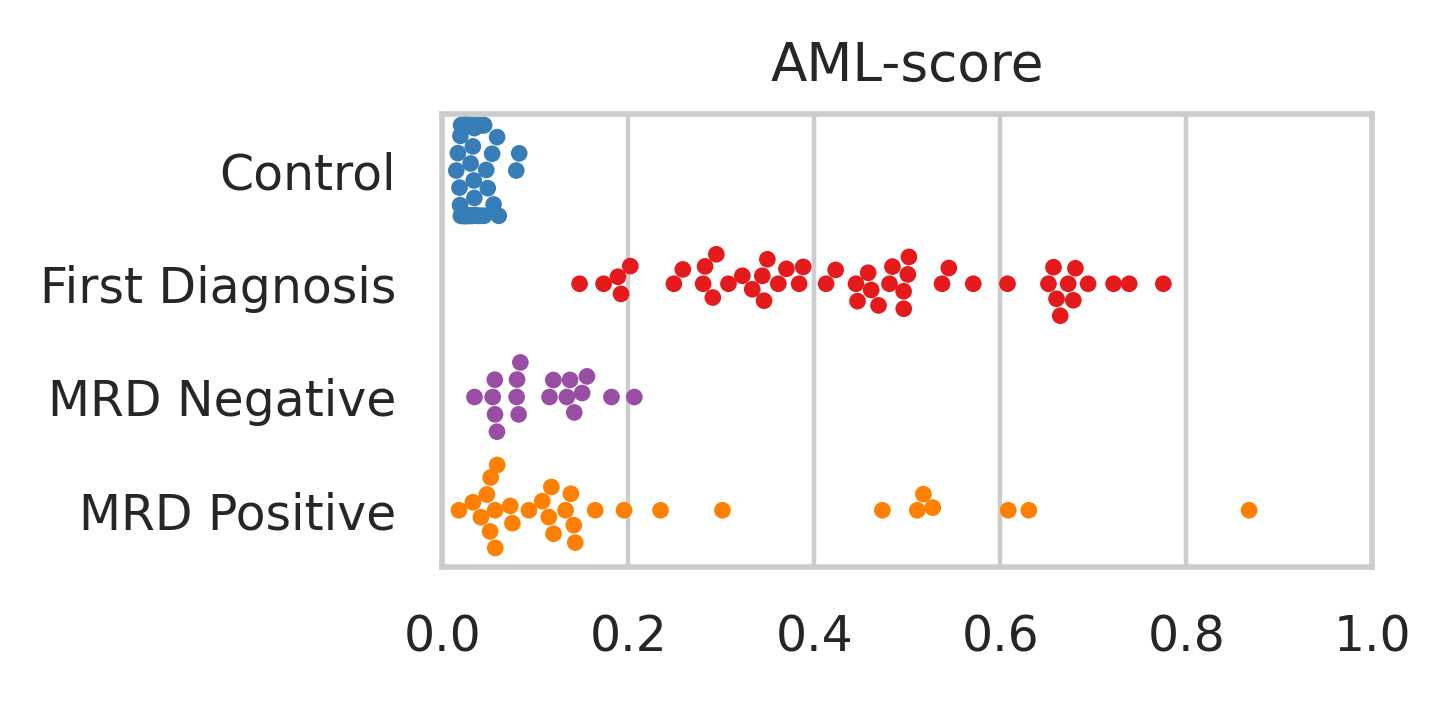

In [11]:
sns.set()
sns.set_style("whitegrid")
sns.set_context("paper")

####### Figures #########
f, axs = plt.subplots(1, 1, figsize=(3, 1.5), dpi=400)
# sns.boxplot(x="group", y="anomaly_ratio", data=anomaly["Mean"],
#             ax=axs, hue="group", palette=colors, dodge=False, showfliers = False)
sns.swarmplot(y="group", x="aml", data=amlscores,
              ax=axs, hue="group", palette=colors, dodge=False, color=".25", size=3,
              order=["Ctrl", "FD", "MN", "MP"])
axs.set_title("AML-score")
axs.set_xlim([0,1])
axs.set(xlabel='')
axs.set(ylabel='')
axs.set_yticklabels(["Control", "First Diagnosis","MRD Negative", "MRD Positive"], rotation=0, ha='right')
axs.get_legend().remove()

# handles, labels = axs.get_legend_handles_labels()
# axs.legend(title='', loc=2,
#            handles= handles, labels=["Control (Training)", "Control (Validation)", "First Diagnosis",
#                               "MRD Negative", "MRD Positive"])
f.savefig("/home/joseph/Dropbox/Work/Manuscripts/2020_Kuo_Leukemia/figures/AML_score.png", bbox_inches='tight', dpi=600)
plt.show()